In [2]:
import pandas as pd
import plotly as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [9]:
customer_shopping_data = pd.read_csv("customer_shopping_data.csv", sep = ',')
customer_shopping_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


ANÁLISIS UNIVARIANTE

¿En qué año se hicieron más transacciones? (invoice_date)

In [24]:
# Añadimos el año en una nueva columna
customer_shopping_data['invoice_date'] = pd.to_datetime(customer_shopping_data['invoice_date'], format='%d/%m/%Y')

customer_shopping_data['year'] = customer_shopping_data['invoice_date'].dt.year

# Guardar el dataframe actualizado en un nuevo archivo CSV
customer_shopping_data.to_csv('customer_shopping_data_con_anio.csv', index=False)

customer_shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_spending,age_group,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,18-35,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,18-35,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,18-35,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,56-69,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,36-55,2021


In [25]:
customer_shopping_data["year"].value_counts()  #cuando se hicieron más transacciones 

year
2022    45551
2021    45382
2023     8524
Name: count, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11572\874874665.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_per_year.index, y=transactions_per_year.values, palette='viridis')


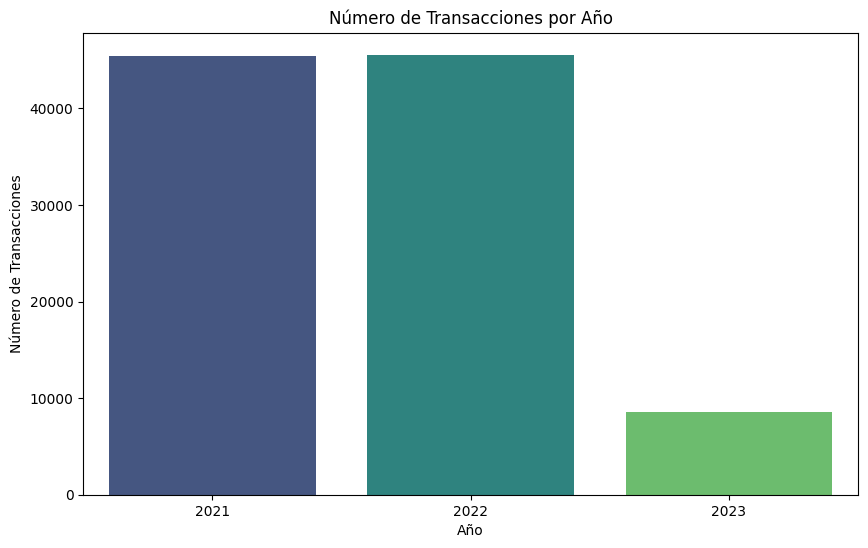

In [31]:


# Convertir 'invoice_date' a formato de fecha
customer_shopping_data['invoice_date'] = pd.to_datetime(customer_shopping_data['invoice_date'], format='%d/%m/%Y')

# Extraer el año de 'invoice_date' y crear una nueva columna
customer_shopping_data['year'] = customer_shopping_data['invoice_date'].dt.year

# Contar cuántas transacciones se hicieron en cada año y ordenar en orden descendente
transactions_per_year = customer_shopping_data['year'].value_counts().sort_index(ascending=False)

# Crear un barplot para las transacciones por año
plt.figure(figsize=(10, 6))
sns.barplot(x=transactions_per_year.index, y=transactions_per_year.values, palette='viridis')

# Personalizar el gráfico
plt.title('Número de Transacciones por Año')
plt.xlabel('Año')
plt.ylabel('Número de Transacciones')
plt.xticks()
plt.show()


¿Qué categoría es la mayoritaria?

In [13]:
customer_shopping_data["category"].value_counts()


category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

¿Cuál es el método de pago más empleado?

In [14]:
customer_shopping_data["payment_method"].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

¿En qué centro comercial se realizan más compras?

In [15]:
customer_shopping_data["shopping_mall"].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

ANÁLISIS BIVARIANTE

ANÁLISIS DEMOGRÁFICO: HÁBITOS DE CONSUMO

Género y gastos totales

In [28]:

# Crear una nueva columna para el gasto total de cada registro
customer_shopping_data['total_spending'] = customer_shopping_data['quantity'] * customer_shopping_data['price']

# Calcular el gasto total por género
total_spending_by_gender = customer_shopping_data.groupby('gender')['total_spending'].sum()

# Calcular el gasto total general
total_spending = total_spending_by_gender.sum()

# Calcular el porcentaje de gasto por género
percentage_spending_by_gender = (total_spending_by_gender / total_spending) * 100

# Mostrar los resultados
print("Porcentaje de gasto total por género:\n", percentage_spending_by_gender)


Porcentaje de gasto total por género:
 gender
Female    59.723131
Male      40.276869
Name: total_spending, dtype: float64


Edad y hábitos de consumo

In [11]:
# Cargar el archivo CSV
# file_path = '/mnt/data/customer_shopping_data.csv'
# customer_shopping_data = pd.read_csv(file_path)

# Crear una nueva columna para el gasto total de cada registro
customer_shopping_data['total_spending'] = customer_shopping_data['quantity'] * customer_shopping_data['price']

total_spending_by_age = customer_shopping_data.groupby('age')['total_spending'].sum()

# Determinar qué género gasta más
gender_spending_comparison = total_spending_by_age.idxmax(), total_spending_by_age.max()

print("Gasto total por edad:\n", total_spending_by_age)


Gasto total por edad:
 age
18    4397720.26
19    4653338.63
20    4607823.85
21    4856158.41
22    5208841.41
23    4647791.41
24    5082409.90
25    4664187.48
26    4981414.82
27    5171859.06
28    4940135.42
29    4883768.82
30    4951952.64
31    4451062.38
32    4405846.15
33    4604652.42
34    4750236.33
35    4738731.54
36    4677239.49
37    5578539.57
38    4994225.53
39    5135672.77
40    5034207.14
41    4714908.39
42    5021505.35
43    5050323.72
44    5131686.80
45    4845927.03
46    5004837.20
47    4610177.41
48    5131747.86
49    4689047.19
50    4579685.63
51    5238724.74
52    4774254.44
53    4813297.99
54    4715925.88
55    4662044.30
56    4553977.87
57    4810432.50
58    4896507.56
59    4548783.23
60    4774714.07
61    4694662.65
62    4796656.48
63    4829099.00
64    5272475.10
65    4715702.31
66    4761442.02
67    4884731.33
68    4967120.72
69    4597580.05
Name: total_spending, dtype: float64


Consumo por rangos de edad

In [12]:
customer_shopping_data['total_spending'] = customer_shopping_data['quantity'] * customer_shopping_data['price']

def age_group(age):
    if 18 <= age <= 35:
        return '18-35'
    elif 36 <= age <= 55:
        return '36-55'
    elif 56 <= age <= 69:
        return '56-69'
    else:
        return 'Other'

# Crear una nueva columna para los grupos de edad
customer_shopping_data['age_group'] = customer_shopping_data['age'].apply(age_group)

# Calcular el gasto total por grupo de edad
total_spending_by_age_group = customer_shopping_data.groupby('age_group')['total_spending'].sum()

# Mostrar los resultados
print("Gasto total por grupo de edad:\n", total_spending_by_age_group)




Gasto total por grupo de edad:
 age_group
18-35    85997930.93
36-55    98403978.43
56-69    67103884.89
Name: total_spending, dtype: float64


En porcentajes

In [27]:


# Crear una nueva columna para el gasto total de cada registro
customer_shopping_data['total_spending'] = customer_shopping_data['quantity'] * customer_shopping_data['price']

# Definir grupos de edad
def age_group(age):
    if 18 <= age <= 35:
        return '18-35'
    elif 36 <= age <= 55:
        return '36-55'
    elif 56 <= age <= 69:
        return '56-69'
    else:
        return 'Other'

# Crear una nueva columna para los grupos de edad
customer_shopping_data['age_group'] = customer_shopping_data['age'].apply(age_group)

# Calcular el gasto total por grupo de edad
total_spending_by_age_group = customer_shopping_data.groupby('age_group')['total_spending'].sum()

# Calcular el gasto total general
total_spending = total_spending_by_age_group.sum()

# Calcular el porcentaje de gasto por grupo de edad
percentage_spending_by_age_group = (total_spending_by_age_group / total_spending) * 100

# Mostrar los resultados
print("Porcentaje de gasto total por grupo de edad:\n", percentage_spending_by_age_group)


Porcentaje de gasto total por grupo de edad:
 age_group
18-35    34.193221
36-55    39.125929
56-69    26.680850
Name: total_spending, dtype: float64


In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [8]:
customer.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000
